In [ ]:
# This notebook can be used to analyse a portfolio and backtest using historical stock data from Quandl API

In [1]:
# Imports
import pandas as pd
import quandl

In [2]:
# Setting start and end times for stock data
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2019-01-01')

In [5]:
# Accessing Quandl API for stock data and creating stock dataframe
quandl.ApiConfig.api_key = "s571QcyUpsdk4fXjpa4k"

amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)
bac = quandl.get('WIKI/BAC.11',start_date=start,end_date=end)
jnj = quandl.get('WIKI/JNJ.11',start_date=start,end_date=end)
pfe = quandl.get('WIKI/PFE.11',start_date=start,end_date=end)
wmt = quandl.get('WIKI/WMT.11',start_date=start,end_date=end)

In [6]:
# Creating normalised returns column in each stock dataframe
for stock_df in (amzn,bac,jnj,pfe,wmt):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [11]:
# 20% in amzn
# 25% in bac
# 15% in jnj
# 10% in pfe
# 30% in wmt

In [12]:
# Assign allocations and create new dataframe column considering returns from new allocations
for stock_df, allo in zip((amzn,bac,jnj,pfe,wmt),[.2,.25,.15,.1,.3]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [14]:
# Create new dataframe column to calclaute monetary returns
for stock_df in (amzn,bac,jnj,pfe,wmt):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [16]:
# Creates large dataframe for postion values of all stocks
all_pos_vals = [amzn['Position Values'],bac['Position Values'],jnj['Position Values'],pfe['Position Values'],wmt['Position Values']]
portfolio_val = pd.concat(all_pos_vals, axis=1)
portfolio_val.columns = ['AMZN Pos','BAC Pos', 'JNJ Pos', 'PFE Pos', 'WMT Pos']

In [17]:
# Calculates total portfolio value
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [18]:
# Graph imports
import matplotlib.pyplot as plt
%matplotlib inline

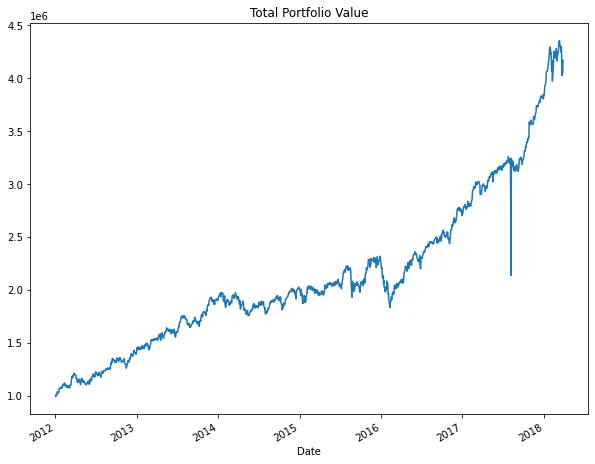

In [22]:
# Graph of total portfolio value
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value');

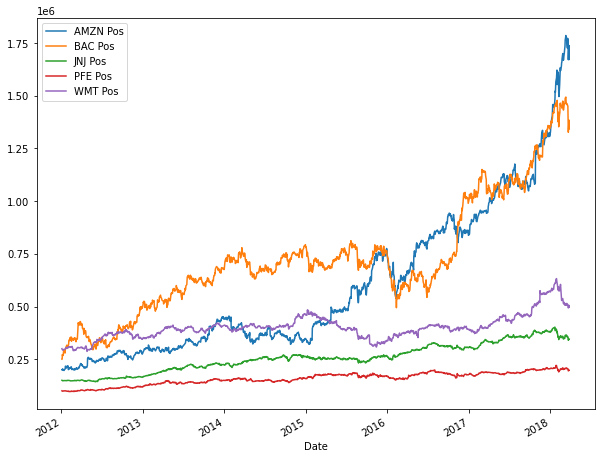

In [21]:
# Graph of each stock holding value
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8));

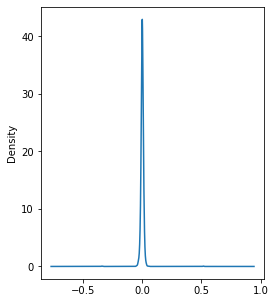

In [28]:
# Calcualtes daily return of portfolio and plots kde graph of daily returns
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
#portfolio_val['Daily Return'].mean()
#portfolio_val['Daily Return'].std()
portfolio_val['Daily Return'].plot(kind='kde',figsize=(4,5));

In [29]:
# Calcualtes percentage cummulative return of portfolio
cummulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0] - 1)

In [33]:
# Calculates Sharpe Ratio
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
ASR = (252**0.5) * SR # annualised sharpe ratio based on 252 business days per year
print(SR)
print(ASR)


0.05694198994292813
0.903926067276773
